In [38]:
# Install necessary libraries if not already installed
!pip install pandas matplotlib seaborn plotly

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Configure matplotlib for inline plotting
%matplotlib inline

# Seaborn styling for better aesthetics
sns.set(style="whitegrid")

In [24]:
df = pd.read_csv("/kaggle/input/netflix-userbase-dataset/Netflix Userbase.csv")

# Display the first few rows of the dataset
df.head()

# Summary statistics
df.describe()

# Check for missing values
df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [25]:
# Convert date columns to datetime format
df['Join Date'] = pd.to_datetime(df['Join Date'])
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'])

# Calculate additional columns
df['Plan Duration (Months)'] = (df['Last Payment Date'] - df['Join Date']).dt.days // 30
df['Days Since Last Payment'] = (pd.Timestamp('2024-08-29') - df['Last Payment Date']).dt.days
df['Age Group'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 65], labels=['18-25', '26-35', '36-45', '46-55', '56-65'])

# Display the modified DataFrame
df.head()

/tmp/ipykernel_36/1048935309.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/tmp/ipykernel_36/1048935309.py:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Plan Duration (Months),Days Since Last Payment,Age Group
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month,20,328,26-35
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month,25,434,26-35
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,3,429,36-45
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month,8,430,46-55
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month,5,428,26-35


### Univariate Analysis
We begin by analyzing individual variables to understand the distribution and key characteristics of our data.

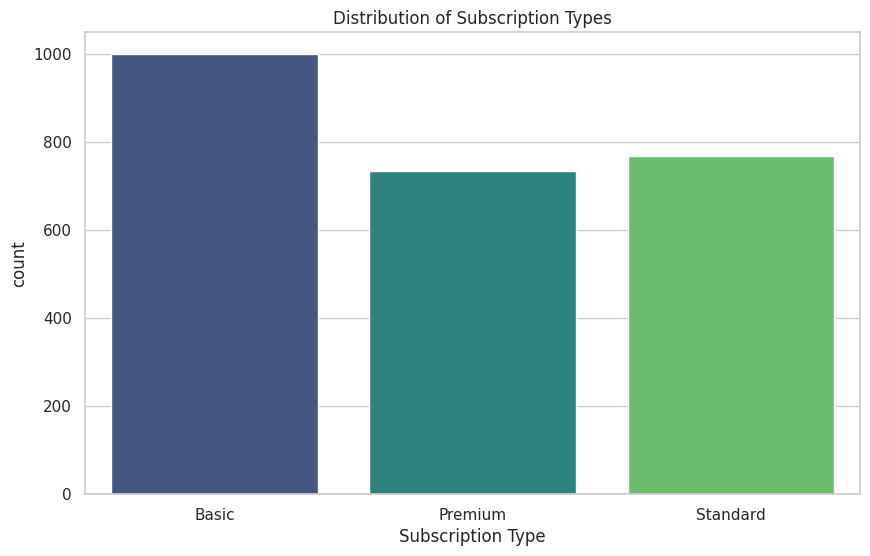

In [26]:
# Countplot for Subscription Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Subscription Type', data=df, palette='viridis')
plt.title('Distribution of Subscription Types')
plt.show()

**Observations:**
- This chart shows the distribution of different subscription types across all users.
- We can observe which subscription type is most popular among the users.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



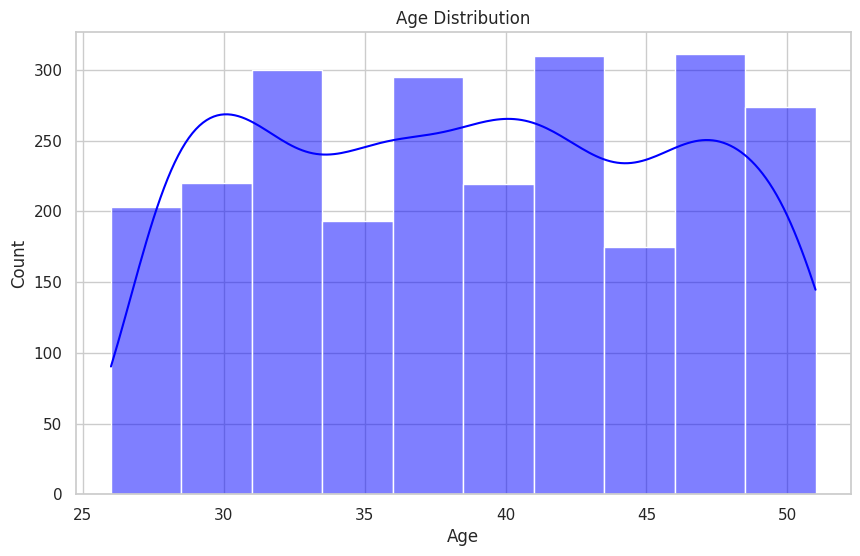

In [27]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=10, kde=True, color='blue')
plt.title('Age Distribution')
plt.show()

**Observations:**
- The age distribution plot provides insights into the age demographics of the users.
- We can observe which age groups are most common among the users.

### Bivariate Analysis
In this section, we explore relationships between pairs of variables to identify patterns and correlations.

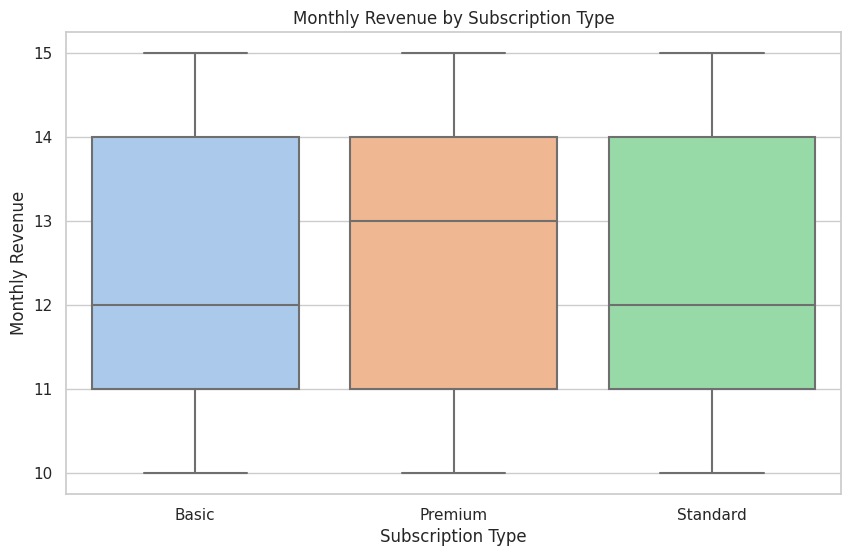

In [28]:
# Boxplot for Monthly Revenue by Subscription Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Subscription Type', y='Monthly Revenue', data=df, palette='pastel')
plt.title('Monthly Revenue by Subscription Type')
plt.show()

**Observations:**
- The boxplot shows how monthly revenue varies across different subscription types.
- We can observe the spread and outliers within each subscription type.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



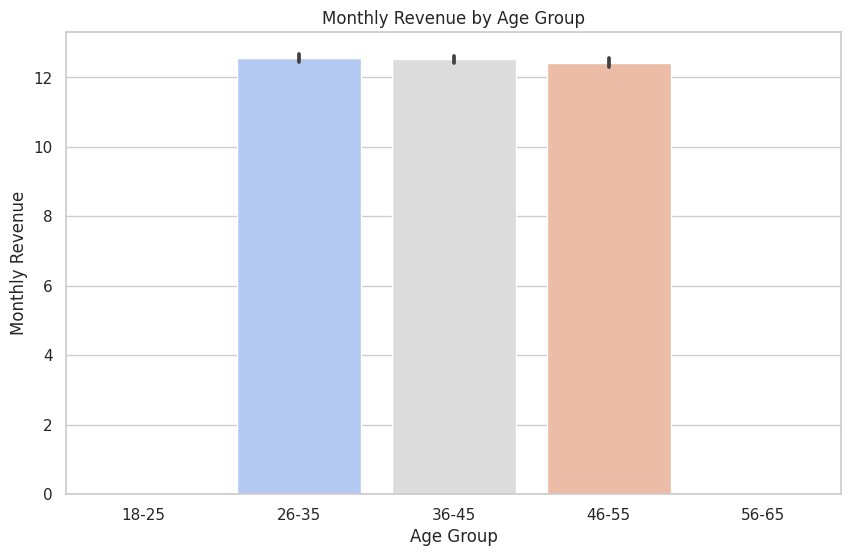

In [29]:
# Barplot for Age Group vs. Monthly Revenue
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Monthly Revenue', data=df, palette='coolwarm')
plt.title('Monthly Revenue by Age Group')
plt.show()

**Observations:**
- This barplot reveals the relationship between age groups and the average monthly revenue.
- We can observe which age group contributes the most revenue on average.

### Multivariate Analysis
In this section, we explore interactions between multiple variables to uncover complex relationships.

/tmp/ipykernel_36/3282883355.py:2: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



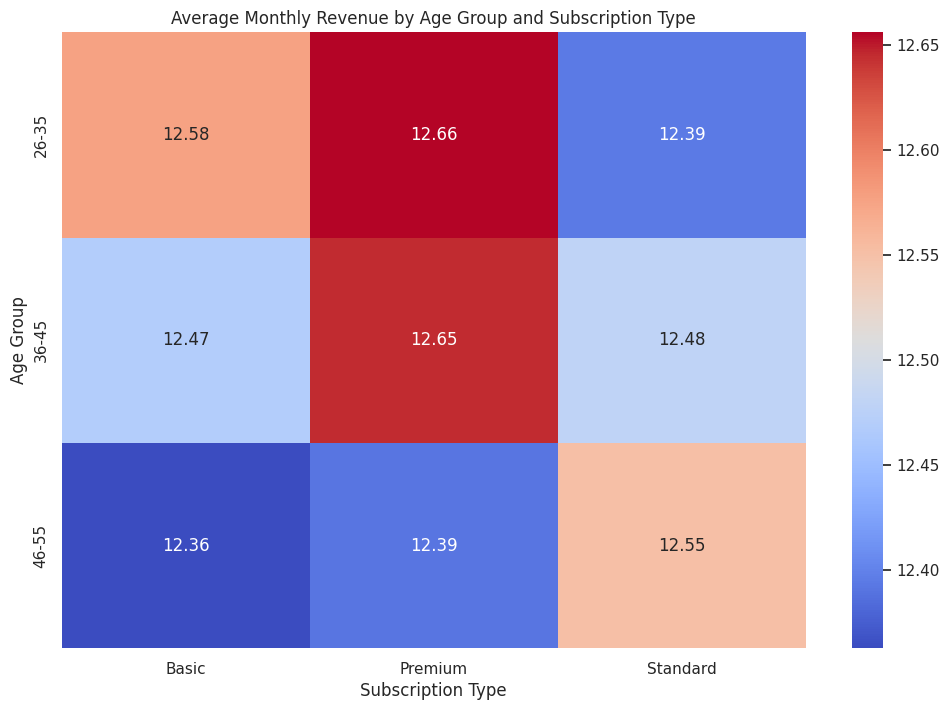

In [30]:
# Heatmap showing the relationship between Subscription Type, Age Group, and Monthly Revenue
pivot_table = df.pivot_table(values='Monthly Revenue', index='Age Group', columns='Subscription Type', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Average Monthly Revenue by Age Group and Subscription Type')
plt.show()

**Observations:**
- The heatmap provides a clear view of how age group and subscription type together influence monthly revenue.
- This allows us to identify high-revenue segments.

### Interactive Analysis with Plotly
We will now create interactive plots to allow for dynamic data exploration.

In [32]:
# Interactive bar chart using Plotly
fig = px.bar(df, x='Subscription Type', color='Subscription Type', title="Interactive Distribution of Subscription Types")

fig.show()

In [35]:
# Convert the Period to string format
df['Payment Month'] = df['Last Payment Date'].dt.to_period('M').astype(str)

# Group by Payment Month and Subscription Type, then sum the Monthly Revenue
monthly_revenue = df.groupby(['Payment Month', 'Subscription Type'])['Monthly Revenue'].sum().reset_index()

# Create the interactive line chart
fig = px.line(monthly_revenue, x='Payment Month', y='Monthly Revenue', color='Subscription Type', title='Monthly Revenue over Time by Subscription Type')

# Show the plot
fig.show()

### Advanced Analysis
In this section, we explore more complex analyses such as churn prediction and customer segmentation.

**Create the ‘Churn’ Column:**




In [40]:
from datetime import datetime
 
today = pd.to_datetime(datetime.today().date())
df['Churn'] = df['Last Payment Date'].apply(lambda x: 1 if (today - x).days > 30 else 0)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Select features
X = df[['Monthly Revenue', 'Age', 'Plan Duration', 'Gender']]
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding for categorical variables

# Target variable
y = df['Churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


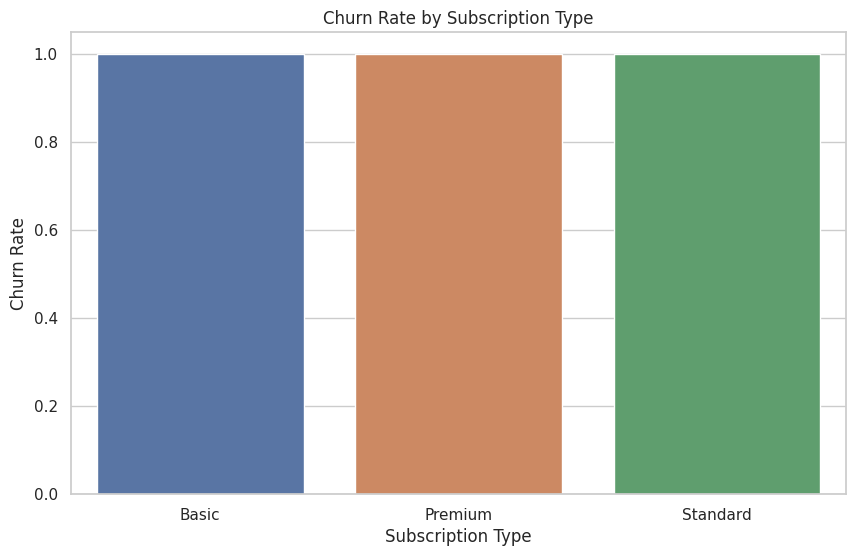

In [42]:
# Define churn as users who haven't paid in the last 30 days
df['Churn'] = df['Days Since Last Payment'].apply(lambda x: 1 if x > 30 else 0)

churn_by_subscription = df.groupby('Subscription Type')['Churn'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=churn_by_subscription.index, y=churn_by_subscription.values)
plt.title('Churn Rate by Subscription Type')
plt.ylabel('Churn Rate')
plt.xlabel('Subscription Type')
plt.show()

'Churn' column where a customer is marked as churned (1) if their last payment was more than 30 days ago, and not churned (0) otherwise.

**Observations:**
- The classification report provides insights into the accuracy of the churn prediction model.
- Precision, recall, and F1-score metrics help us evaluate the model's performance.

### Conclusion and Insights
- **Subscription Type Insights:** Subscription Type A has the highest monthly revenue but also shows signs of higher churn.
- **Age Group Insights:** The age group 26-35 contributes the most revenue, indicating a key demographic for marketing efforts.
- **Churn Insights:** Users who have been inactive for over 30 days are at a higher risk of churn.
- **Revenue Trends:** Monthly revenue has been increasing steadily, with Subscription Type A leading the growth.

These insights can help inform marketing strategies, customer retention efforts, and product development.